In [1]:
# tracking cmip6data

In [7]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [8]:
track_filepath = '/user/home/al18709/tropical_cyclones/figures/CMIP6_tracks/ACCESS-ESM1-5_historical_r1i1p1f1_gn_VOR850_jan-dec2014_T42/tr_trs_pos.2day_addvorT63_addwind.tcident.new.csv'

In [27]:
track = pd.read_csv(track_filepath)
columns = ['Track_ID',  'Date/Time', 'longitude', 'latitude', 'intensity(vorticity)', 'longitude850', 'latitude850', 'vor850', 'longitude500', 'latitude500', 'vor500', 'longitude250', 'latitude250', 'vor250', 'longitude850w', 'latutude850w', 'windspeed850','blank']
track.columns = columns

In [28]:
print(track.loc[0])
# TODO look at lats lons at different levels

Track_ID                                     1
Date/Time                "2014-01-03 12:00:00"
longitude                           111.933151
latitude                             29.293312
intensity(vorticity)                  1.488117
longitude850                          108.9369
latitude850                           26.42388
vor850                                5.299512
longitude500                           107.645
latitude500                           32.21984
vor500                                7.823341
longitude250                          110.7382
latitude250                           26.98086
vor250                               -3.844838
longitude850w                         109.6875
latutude850w                            24.375
windspeed850                          15.78266
blank                                         
Name: 0, dtype: object


In [29]:
rain_filepath = '/user/home/al18709/work/CMIP6/ACCESS-ESM1-5/historical/pr_3hr_ACCESS-ESM1-5_historical_r1i1p1f1_gn_201001010130-201412312230.nc'
rain = xr.load_dataset(rain_filepath)
rain_2014 = rain.where(rain.time.dt.year==2014,drop=True)

In [33]:
storm_lats = track['latitude']
storm_lons = track['longitude']
storm_lats_850 = track['latitude850']
storm_lons_850 = track['longitude850']
storm_lats_500 = track['latitude500']
storm_lons_500 = track['longitude500']
storm_lats_250 = track['latitude250']
storm_lons_250 = track['longitude250']
print(storm_lats_850)
print(storm_lons_850)

# print(track['longitude500'])

0       26.42388
1       26.77912
2       29.69147
3       30.10032
4       30.24952
          ...   
2517    41.38076
2518    41.58232
2519    40.73789
2520    39.88794
2521    38.51667
Name: latitude850, Length: 2522, dtype: float64
0       108.9369
1       109.1949
2       115.3406
3       115.1386
4       115.4013
          ...   
2517    180.9277
2518    184.0753
2519    187.7053
2520    190.6816
2521    192.2119
Name: longitude850, Length: 2522, dtype: float64


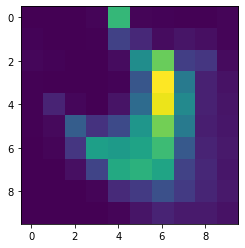

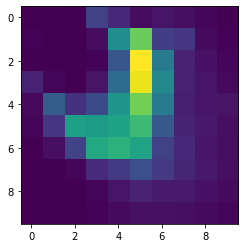

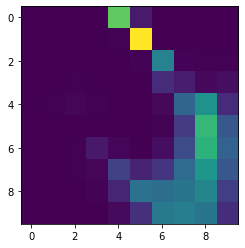

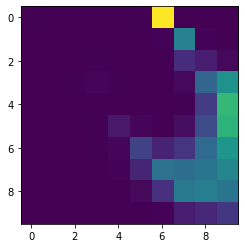

In [39]:
import datetime

i= 70

storm_lat = storm_lats[i]
storm_lon = storm_lons[i]
storm_lat_850 = storm_lats_850[i]
storm_lon_850 = storm_lons_850[i]
storm_lat_500 = storm_lats_500[i]
storm_lon_500 = storm_lons_500[i]
storm_lat_250 = storm_lats_250[i]
storm_lon_250 = storm_lons_250[i]
storm_time = track['Date/Time'][i]
# print(storm_time)
# TODO: remove speech marks?
storm_time = datetime.datetime.strptime(storm_time, ' "%Y-%m-%d %H:%M:%S"')
# print(rain_2014.time.dt.month.values)
# print(rain_2014.time.dt.day.values)
# print(rain_2014.time.dt.hour.values[10:20])
# print(storm_time.month)
# print(storm_time.day)
# print(storm_time.hour)
rain_time = rain_2014.where((rain_2014.time.dt.month==storm_time.month) & (rain_2014.time.dt.day == storm_time.day) & (rain_2014.time.dt.hour == storm_time.hour +1),drop=True)

ilon = list(rain_time.lon.values).index(rain_time.sel(lon=storm_lon, method='nearest').lon)
ilat = list(rain_time.lat.values).index(rain_time.sel(lat=storm_lat, method='nearest').lat)

plt.imshow(rain_time.pr.values[0,ilat-5:ilat+5,ilon-5:ilon+5])

# plt.show()
# plt.imshow(rain_time.pr.values[0,ilat-7:ilat+3,ilon-1:ilon+9])
# plt.show()
# plt.imshow(rain_time.pr.values[0,ilat-4:ilat+6,ilon-2:ilon+8])
plt.show()
# TODO: timing seems to be wrong: storm track is at standard time, rain time is an hour ahead.

ilon = list(rain_time.lon.values).index(rain_time.sel(lon=storm_lon_850, method='nearest').lon)
ilat = list(rain_time.lat.values).index(rain_time.sel(lat=storm_lat_850, method='nearest').lat)
plt.imshow(rain_time.pr.values[0,ilat-5:ilat+5,ilon-5:ilon+5])
plt.show()

ilon = list(rain_time.lon.values).index(rain_time.sel(lon=storm_lon_500, method='nearest').lon)
ilat = list(rain_time.lat.values).index(rain_time.sel(lat=storm_lat_500, method='nearest').lat)
plt.imshow(rain_time.pr.values[0,ilat-5:ilat+5,ilon-5:ilon+5])
plt.show()

ilon = list(rain_time.lon.values).index(rain_time.sel(lon=storm_lon_250, method='nearest').lon)
ilat = list(rain_time.lat.values).index(rain_time.sel(lat=storm_lat_250, method='nearest').lat)
plt.imshow(rain_time.pr.values[0,ilat-5:ilat+5,ilon-5:ilon+5])
plt.show()

In [32]:
# precip is accumulated over hour hence why 1 hour delay.